
# Project: Investigating the No-Show Appointments dataset
### Adaobi Onyeakagbu

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this task, I have chosen the No-Show Appointments dataset, originally provided by Kaggle. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. From the number of patient characteristics, I will focus on:
* The factors which determine if a Patient missed their appointment or not. For this, I will investigate gender, ages, appointment day and SMS received to see if there are correlations between them and Patient Appointment turn out. 
* What illnesses are determined by the ages of a patient. For this I will look at the correlations between age and Alcoholism, Diabetes and Hypertension.

In [1]:
#importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, I will check for completeness and cleanliness of the data, while also observing the basic information about the data, to get a picture of what the data is like and get it ready for analysis.

### General Properties

First, I read the No Show Appointments CSV file into a dataframe using Pandas and viewed a few lines. The dataset was pretty straightforward to read.

In [2]:
df = pd.read_csv('/Users/adaobitether/Documents/UDACITY/UdacityDA/Investigate_Dataset/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next, to get an idea of the number of rows and columns are in the dataset, I checked out the shape:

In [3]:
df.shape

(110527, 14)

We have 110527 patients with 14 patient characteristics, but I don't have any further information about what is in these cells. Hence, I use the info function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The above result shows that there are no null or NA values in the dataset. It also shows us the data types of the columns in the dataset.

Next, I checked the description summary of the dataset, which involves the mean, std, and 5 number summary of the dataset.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The above result tells us that most patients do not have a scholarship, Hypertension, Diabetes or Alcoholism. On the average, most patients did not receive an SMS reminder. 

Because Patient ID, Appointment ID, Neighbourhood and Scheduled Day seem to be quite specific to patients and doesn't really tell us any much information on patient behaviour, I dropped those columns. I also dropped the Scholarship column because it is not in the scope of my objectives.

In [6]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'Neighbourhood', 'Scholarship'], axis = 1, inplace= True)
df.head()

,Gender,AppointmentDay,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,1,1,0,0,0,No


The result also tells us that the average age of patients is 37 years, with a minimum age of -1 and maximum of 115. That doesn't seem right, and this '-1' value is probably an error as age cannot be less than 0. Hence, I will also drop columns that don't fit this criteria.

In [7]:
df.drop(df[df['Age'] < 0 ].index , inplace=True)
df.shape

(110526, 9)

There also seems to be something wrong with the Handicap column so I will investigate this further. 

In [8]:
df.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

It seems that the Handicap data was placed on a 5 nominal scale, with values very skewed to the right.

Next, I will rename the columns for best practices.

In [9]:
df.rename(columns={"No-show": "Noshow", "Hipertension": "Hypertension", "Handcap":"Handicap"}, inplace=True)

### Data Cleaning

The data needs to be cleaned to make sure that it is ready to be worked on. This dataset is actually pretty clean as there are no null values or na values as seen earlier. Also, the datatype of the columns is very important in finding out data about the dataset. Some columns will not accept some operations because of their datatype, so I will focus on parsing them.

In [10]:
df.dtypes

Gender            object
AppointmentDay    object
Age                int64
Hypertension       int64
Diabetes           int64
Alcoholism         int64
Handicap           int64
SMS_received       int64
Noshow            object
dtype: object

The dependent variable, which is patients showing up or not, is currently an object datatype. I am not able to properly see the dependencies other characteristics have with this variable, so I will encode it. I used the encoding method of designating values to the categories of variables in each column. I used this instead of the get_dummies function because it reduces the number of feature rows added to my dataframe. I then replaced the non-numeric values with the category values (numeric). 0 means the patient was NOT a no-show while 1 means the patient was a no-show.

In [11]:
cleanup_nums = {"Noshow":     {"No": 0, "Yes": 1}} #a variable that assigns numeric value to categories in a column
df.replace(cleanup_nums, inplace=True) #use this variable to encode the columns specified 
df.head()

,Gender,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,F,2016-04-29T00:00:00Z,62,1,0,0,0,0,0
1,M,2016-04-29T00:00:00Z,56,0,0,0,0,0,0
2,F,2016-04-29T00:00:00Z,62,0,0,0,0,0,0
3,F,2016-04-29T00:00:00Z,8,0,0,0,0,0,0
4,F,2016-04-29T00:00:00Z,56,1,1,0,0,0,0


Also, Appointment Day, which is the day that the patient was to show up for their appointment, is not in the appropriate datatype. So, next step is to change it to the datetime type using Pandas. I would also like to see if the day of the week has an effect on no-show appointments, so I created a new column for the day of the week, which is calculated by Pandas dayofweek attribute (ranging from 0-6, Monday to Sunday).

In [12]:
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)
df['appt_day'] = df['AppointmentDay'].dt.weekday_name
df.head()

,Gender,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,appt_day
0,F,2016-04-29 00:00:00+00:00,62,1,0,0,0,0,0,Friday
1,M,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,Friday
2,F,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,Friday
3,F,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,Friday
4,F,2016-04-29 00:00:00+00:00,56,1,1,0,0,0,0,Friday


Now, we can properly visualise the dataset using a histogram.

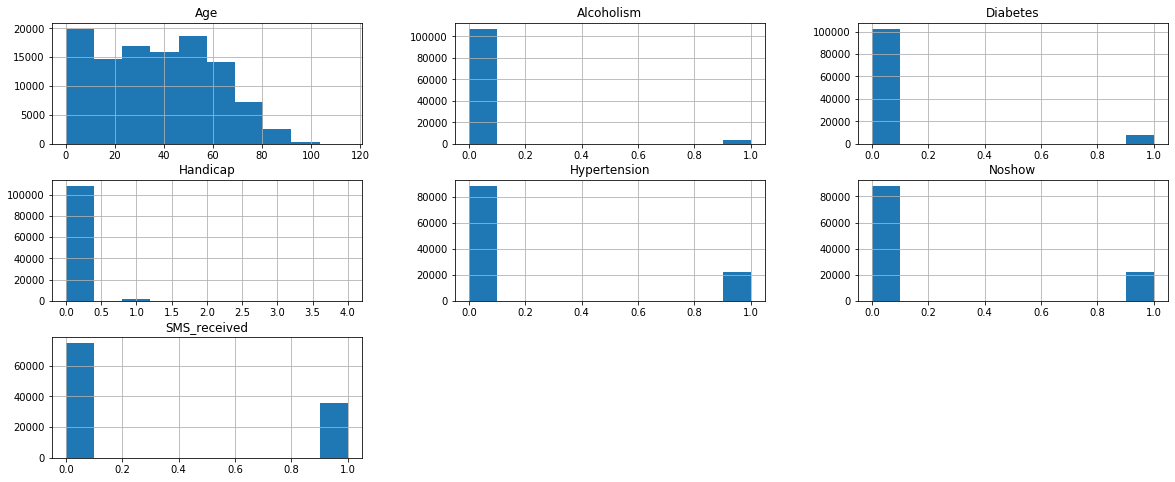

In [13]:
df.hist(figsize=(20,8));

Now that our data now makes sense, it is time to analyse it and answer the questions posed.

<a id='eda'></a>
## Exploratory Data Analysis

In this section, we will try to answer the questions posed in the Introduction by looking at the variables one after another to see how they relate.

### Does the gender of a patient determine if he/her shows up or not?

First, I attempted to visualise the shape of the female and male appointments. THis is done with a Seaborn count plot. 

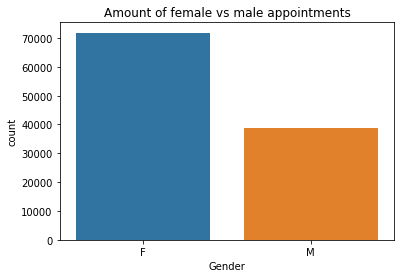

In [14]:
sns.countplot(x='Gender', data=df)
plt.title('Amount of female vs male appointments');

Next, I used the same countplot to visualise the amount of females and males who showed up to their appointments or not.

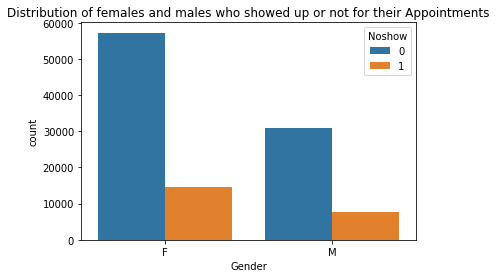

In [15]:
ax = sns.countplot(x=df.Gender, hue=df.Noshow, data=df)
plt.title("Distribution of females and males who showed up or not for their Appointments")
plt.show();

In [16]:
show= df.Noshow== False
no_show = df.Noshow == True

missed_F=  (len(df.loc[(df['Gender']=="F") & (no_show)])/len(df.loc[df['Gender']=="F"])) *100
missed_M=  (len(df.loc[(df['Gender']=="M") & (no_show)])/len(df.loc[df['Gender']=="M"])) *100
print(missed_F)
print(missed_M)

20.314870752655242
19.967947889471915


* From this data, we can see that though more women missed their appointments, only about 20% of either gender failed to show up because there were more appointments made by women than men.

### What factors do the Age distribution determine?

First, we look at the distribution of appointments by age. 

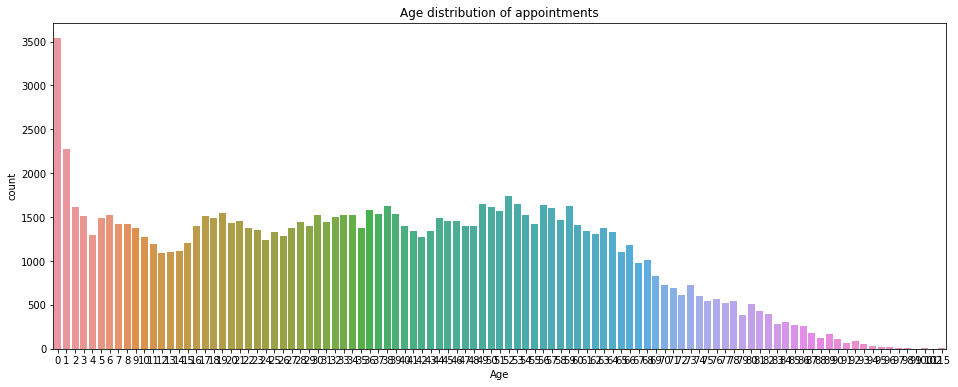

In [17]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x=df.Age)
plt.title("Age distribution of appointments")
plt.show()

* The data shows us that there are more young people up for appointments than older people, with patients aged 0 having the highest number. 
* The data is very skewed to the right as appointment count drops heavily as age increases. 


However, to see the impact of age on the turn up, I use a Histogram to visualise this.

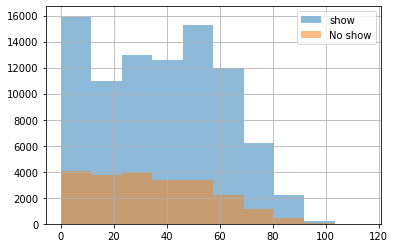

In [18]:
df.Age[show].hist(alpha=0.5, label='show')
df.Age[no_show].hist(alpha=0.5, label='No show')
plt.legend()

* The histogram reveals that most young people between the age of 0-10 turn up for their appointments. 
* More people between the ages of 10-30 are missed their appointments more compared to people between the ages of 0-10. People between 40-60 missed their appointments less as well.

Next, we look at the age distribution for each illness (Hypertension, Diabetes and Alcoholism), while still taking into account if these patients showed up to their appointments or not.

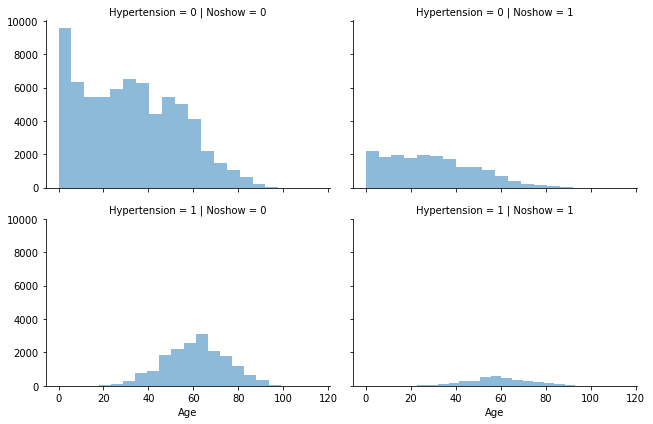

In [19]:
##Hypertension Facet Grid Map
grid= sns.FacetGrid(df, col='Noshow', row='Hypertension', height=3.0, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend();

In [20]:
hyper=  (len(df.loc[(df['Hypertension']==True) & 
                    ((df['Age']>=45) & (df['Age']<=75))])/len(df.loc[(df['Hypertension']==True)])) *100      
print("Percentage of patients between 45 and 75 with Hypertension is {}%".format(hyper))

Percentage of patients between 45 and 75 with Hypertension is 72.18476216687309%


* We can see that most people don't have hypertension.
* Patients between the ages of 45 and 75 have more cases of hypertension (72.18%), with patients between 60 and 65 having the hightest number
* Most people who have hypertension showed up for their appointments.
* The relationship between age and hypertension gives a normal distribution with mean around age 60-65.

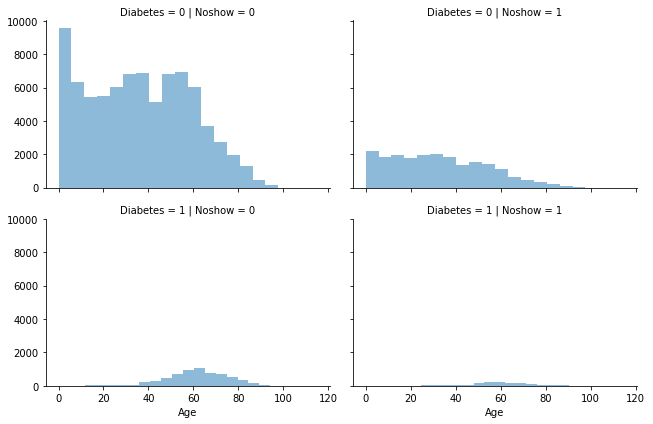

In [21]:
## Diabetes facet grid map

grid= sns.FacetGrid(df, col='Noshow', row='Diabetes', height=3.0, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend();

In [22]:
diab=  (len(df.loc[(df['Diabetes']==True) & 
                    ((df['Age']>=50) & (df['Age']<=75))])/len(df.loc[(df['Diabetes']==True)])) *100      
print("Percentage of patients between 50 and 75 with Diabetes is {}%".format(diab))

Percentage of patients between 50 and 75 with Diabetes is 67.8710814553695%


* Most of the patients do not have diabetes.
* The patients that do have diabetes are mostly within the range of 50-75 (67.87% of diabetes patients), with 55-65 having the highest number. Most of the them turned up for their appointments as well.
* The relationship between age and diabetes follows a normal distribution with mean around age 60.

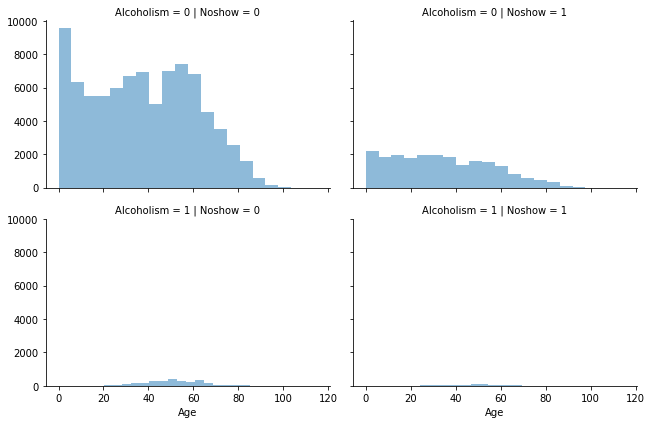

In [23]:
# Alcoholism facet grid map

grid= sns.FacetGrid(df, col='Noshow', row='Alcoholism', height=3.0, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend();

Most of the patients are not alcoholics. It is difficult to see a relationship between alcoholism and age in this case.

### What day of the week has the most no-shows?

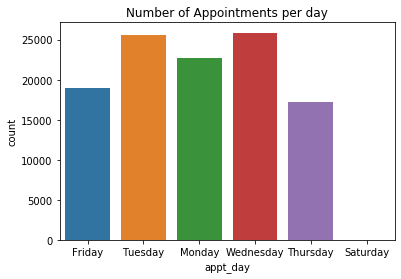

In [24]:
sns.countplot(x='appt_day', data=df)
plt.title('Number of Appointments per day');

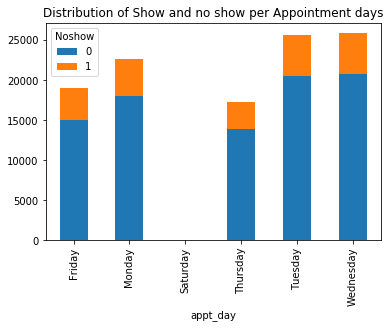

In [25]:
df.groupby(['appt_day', 'Noshow'])['appt_day'].count().unstack('Noshow').plot(kind='bar', stacked=True)
plt.title("Distribution of Show and no show per Appointment days")
plt.show();

In [26]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] #sunday is not a data entry included in the dataset
for i, day in enumerate(days_of_week):
    missed=  (len(df.loc[(df['appt_day']== day) & (no_show)])/len(df.loc[df['appt_day']== day])) *100
    print("Percentage of Appointments missed on {} is {}%.".format(day, missed))

Percentage of Appointments missed on Monday is 20.648058466144228%.
Percentage of Appointments missed on Tuesday is 20.093603744149764%.
Percentage of Appointments missed on Wednesday is 19.689179263153825%.
Percentage of Appointments missed on Thursday is 19.354090566475328%.
Percentage of Appointments missed on Friday is 21.226142278773857%.
Percentage of Appointments missed on Saturday is 23.076923076923077%.


* From the statistics above, the percentage of missed appointments for each day of the week is pretty much around the same range. 
* Tuesdays and Wednesdays had the higher number of appointments while Saturdays had the least. Saturdays also had the highest percentage of missed appointments at 23%.
* There doesn't seem to be much correlation between the day of the week the appointment was and the appointment turn out. 

### Do more patients turn up if they receive an SMS?

Another interesting thing to investigate is the effect of receiving SMS notifications on appointment turn up. To see how SMS notifications affect patient turn up, I visualise this in a plot. 

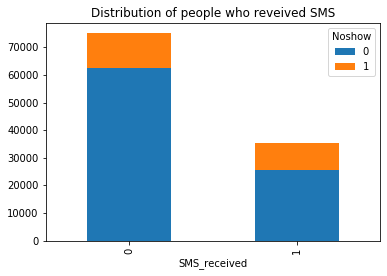

In [27]:
df.groupby(['SMS_received', 'Noshow'])['SMS_received'].count().unstack('Noshow').plot(kind='bar', stacked=True)
plt.title("Distribution of people who reveived SMS")
plt.show();

Since more people generally showed up to their appointments, let's focus on the impact of SMS reminders on patient turning up or not. The plot below shows the SMS received affects the proportion of patients who turned up or not instead.

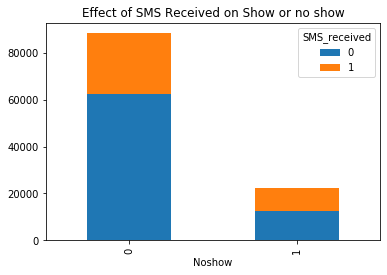

In [28]:
df.groupby(['SMS_received', 'Noshow'])['Noshow'].count().unstack('SMS_received').plot(kind='bar', stacked=True)
plt.title("Effect of SMS Received on Show or no show")
plt.show();

In [29]:
sms_show=  (len(df.loc[(df['SMS_received']==True) & (show)])/len(show)) *100
sms_noshow=  (len(df.loc[(df['SMS_received']==True) & (no_show)])/len(no_show)) *100

print("Percentage of people who showed up when they received SMS is {}%".format(sms_show))
print("Percentage of people who did not show up though they received SMS is {}%".format(sms_noshow))

Percentage of people who showed up when they received SMS is 23.250637858965312%
Percentage of people who did not show up though they received SMS is 8.85221576823553%


* We can see that 23.25% of people showed up when they received SMS reminders, much higher than the 8.85% who didn't though they did receive SMS. This shows a strong correlation between SMS_received and No_show.

<a id='conclusions'></a>
## Conclusions

1. The Gender of patients doesn't seem to have any effect on patients turning up for their appointment or not.
2. The data shows us that there are more young people up for appointments than older people, with patients aged 0 having the highest number. Most of the patients aged 0-10 and 40-60 missed their appointments LESS, as compared to people between the ages of 10-30.
3. Most of the patients did not have diabetes, alcoholism or hypertension. However, most patients who did have hypertension and diabetes turned up for their appointments.
4. 72.18% of patients between the ages of 45 and 75 have Hypertension while 67.87% of patients between the ages of 50-75 have Diabetes. This shows a strong correlation betwen the ages of patients and their likelihood to have hypertension or diabetes. Age does not seem to be a factor that affects alcoholism though.
5. The day of the appointment does not seem to be a factor for missing appointments as the percentage of missed appointments for each day are around the same range 20-23%, with saturday having the highest percentage, with the least number of appointments.
6. The sending of SMS to patients has an effect on their turning up as 23.25% of people showed up when they received SMS reminders, much higher than the 8.85% who didn't though they received SMS. 